# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, auc
from sklearn.linear_model import LogisticRegressionCV

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

In [4]:
# Загрузка данных
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [6]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

In [10]:
# Модели с регуляризацией
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

In [12]:
# Полиномиальная регрессия
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [14]:
# Проверяем размеры массивов
predictions = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Polynomial Regression": y_pred_poly,
}

for model_name, y_pred in predictions.items():
    print(f"{model_name}:")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print()

Linear Regression:
R2: 0.4773
MSE: 2821.7510
MAE: 41.9194

Ridge Regression:
R2: 0.4233
MSE: 3112.9664
MAE: 45.4635

Lasso Regression:
R2: 0.3619
MSE: 3444.6708
MAE: 49.2079

Polynomial Regression:
R2: 0.4130
MSE: 3168.9304
MAE: 44.2214



In [16]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge регрессия на масштабированных данных
ridge_model_scaled = Ridge()
ridge_model_scaled.fit(X_train_scaled, y_train)
y_pred_ridge_scaled = ridge_model_scaled.predict(X_test_scaled)

# Lasso регрессия на масштабированных данных
lasso_model_scaled = Lasso()
lasso_model_scaled.fit(X_train_scaled, y_train)
y_pred_lasso_scaled = lasso_model_scaled.predict(X_test_scaled)

In [18]:
# Проверяем размеры массивов
predictions = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge_scaled,
    "Lasso Regression": y_pred_lasso_scaled,
    "Polynomial Regression": y_pred_poly,
}

for model_name, y_pred in predictions.items():
    print(f"{model_name}:")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print()

Linear Regression:
R2: 0.4773
MSE: 2821.7510
MAE: 41.9194

Ridge Regression:
R2: 0.4776
MSE: 2819.9820
MAE: 41.8784

Lasso Regression:
R2: 0.4842
MSE: 2784.3344
MAE: 41.8644

Polynomial Regression:
R2: 0.4130
MSE: 3168.9304
MAE: 44.2214



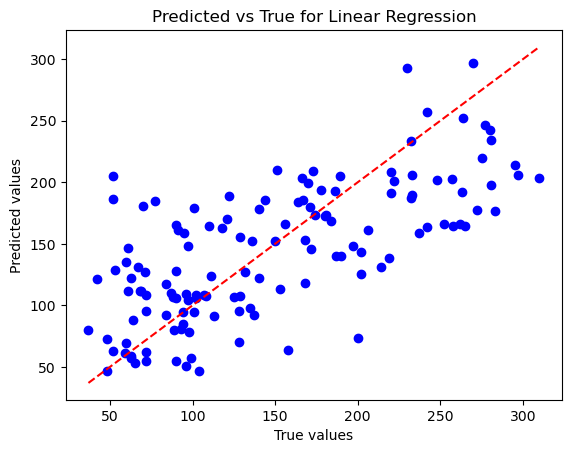

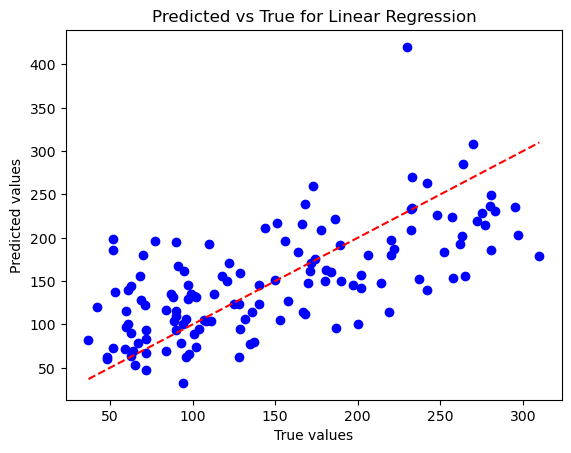

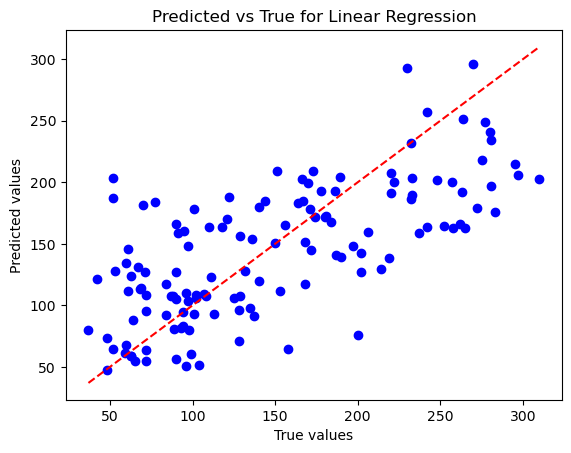

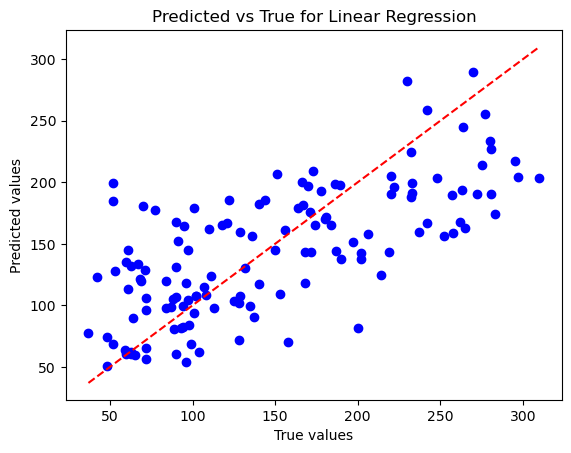

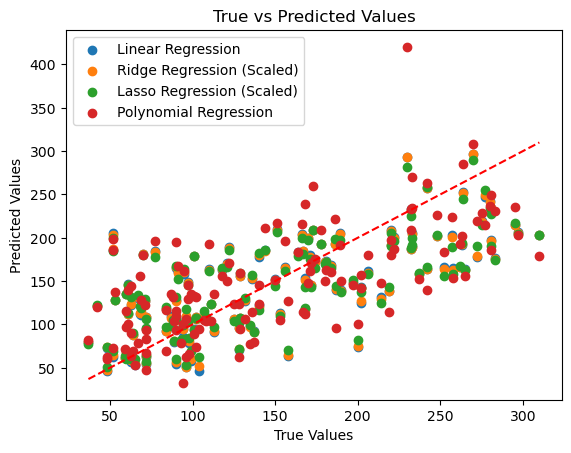

In [20]:
# Построение графика "предсказанные против истинных" значений для Linear Regression
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение графика "предсказанные против истинных" значений для Polynomial Regression
plt.scatter(y_test, y_pred_poly, color='blue', label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение графика "предсказанные против истинных" значений для Ridge
plt.scatter(y_test, y_pred_ridge_scaled, color='blue', label='Ridge')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение графика "предсказанные против истинных" значений для Lasso
plt.scatter(y_test, y_pred_lasso_scaled, color='blue', label='Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение scatterplot
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.scatter(y_test, y_pred_ridge_scaled, label="Ridge Regression (Scaled)")
plt.scatter(y_test, y_pred_lasso_scaled, label="Lasso Regression (Scaled)")
plt.scatter(y_test, y_pred_poly, label="Polynomial Regression")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

Линейная регрессия показала базовый результат с R² = 0.4773, MSE = 2821.7510, MAE = 41.9194. Ridge регрессия улучшила результаты (R² = 0.4776, MSE = 2819.9820), а Lasso регрессия показала наилучшие показатели (R² = 0.4842, MSE = 2784.3344), благодаря отбору признаков и уменьшению мультиколлинеарности. Полиномиальная регрессия дала худшие результаты (R² = 0.4130, MSE = 3168.9304). Масштабирование улучшило результаты моделей с регуляризацией, особенно Lasso.   

Таким образом Lasso регрессия показала наилучшие результаты.

2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [24]:
# Загрузка данных
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [26]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# Параметры для кросс-валидации
C_values = np.logspace(-4, 4, 20)

In [65]:
# Логистическая регрессия с кросс-валидацией для выбора C
C_values = np.logspace(-4, 4, 10)

logistic_model = LogisticRegressionCV(Cs=C_values, cv=5, scoring='roc_auc', solver='liblinear', max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

optimal_C = logistic_cv.C_[0]
print(f"Оптимальное значение параметра C: {optimal_C:.4f}")

Оптимальное значение параметра C: 2.7826


In [67]:
# Средние значения ROC-AUC для каждого значения C
mean_scores = logistic_model.scores_[1].mean(axis=0)
optimal_C = logistic_model.C_[0]

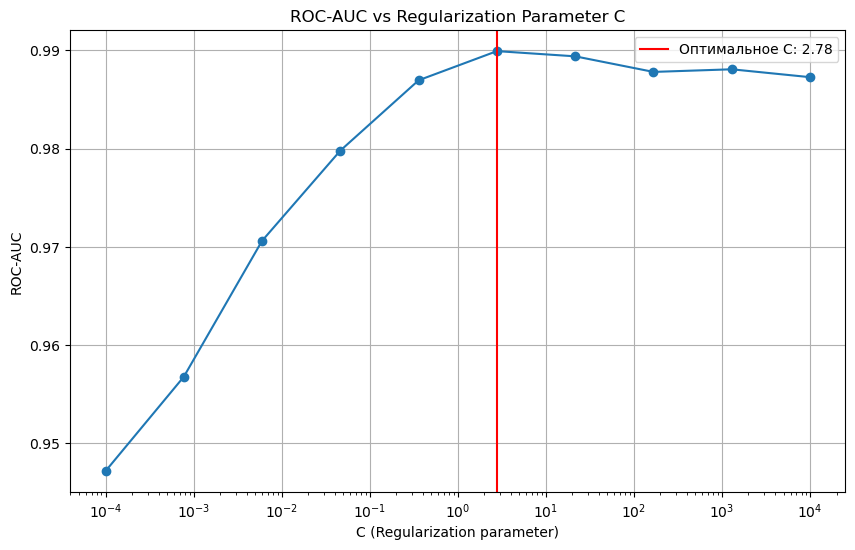

In [69]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, mean_scores, marker='o')
plt.axvline(optimal_C, color='r', label=f'Оптимальное C: {optimal_C:.2f}')

plt.xlabel("C (Regularization parameter)")
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC vs Regularization Parameter C")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Получение вероятностей для положительного класса
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Вычисление метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.5f}")

ROC-AUC: 0.99677


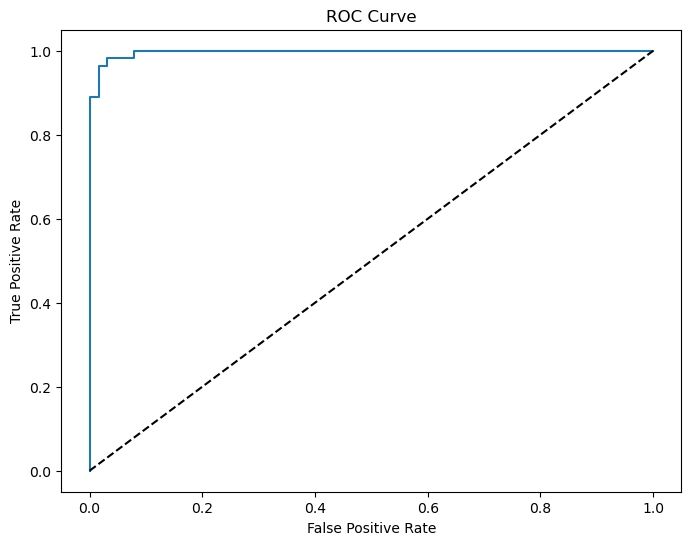

In [73]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

С помощью LogisticRegressionCV был выполнен поиск наилучшего значения параметра регуляризации C, что помогло оценить его влияние на метрику ROC-AUC. График, отражающий зависимость ROC-AUC от параметра C, продемонстрировал, что при небольших значениях C (сильная регуляризация) модель оказывалась недообученной, что приводило к низким показателям ROC-AUC. По мере увеличения C значение ROC-AUC возрастало, достигая пика, после чего стабилизировалось, что свидетельствует о возможном переобучении.   

Оптимальное значение C было определено в точке максимального значения ROC-AUC и составило 2.78.   
На тестовых данных модель с этим параметром достигла ROC-AUC 0.996. 

3. Выбрать порог классификации для LogisticRegression на основе метрики

In [75]:
# Обучение логистической регрессии с оптимальным C из предыдущего шага
logistic_model_optimal = LogisticRegression(C=optimal_C, max_iter=10000)
logistic_model_optimal.fit(X_train, y_train)

LogisticRegression(C=2.782559402207126, max_iter=10000)

In [77]:
# Обучение логистической регрессии с оптимальным C из предыдущего шага
logistic_model_optimal = LogisticRegression(C=optimal_C, max_iter=10000)
logistic_model_optimal.fit(X_train, y_train)
y_pred_proba_train = logistic_model_optimal.predict_proba(X_train)[:, 1]

In [79]:
# Определение порога на основе метрики F1
thresholds = np.linspace(0, 1, 50)
y_pred_proba_train = logistic_model_optimal.predict_proba(X_train)[:, 1]  # Вероятности класса 1

In [81]:
# Нахождение порога, при котором F1-score - максимальное
f1_scores = [f1_score(y_train, y_pred_proba_train >= threshold) for threshold in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]

In [83]:
# Предсказания для тестовых данных с использованием оптимального порога
y_pred_proba_test = logistic_model_optimal.predict_proba(X_test)[:, 1]  # Вероятности класса 1
y_pred_test = (y_pred_proba_test >= optimal_threshold).astype(int)

# Оценка качества модели на тестовых данных
f1_test = f1_score(y_test, y_pred_test)

print(f'На тестовых данных с порогом {optimal_threshold:.4f}:')
print(f'F1-Score: {f1_test:.4f}')

На тестовых данных с порогом 0.5918:
F1-Score: 0.9770


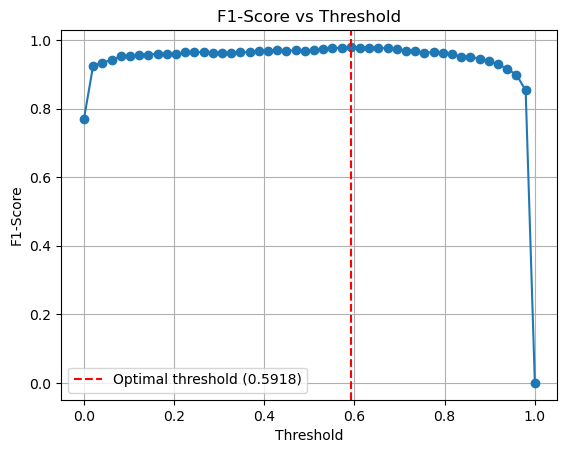

При оптимальном пороге классификации: 0.5918 достигается F1-Score = 0.9798


In [85]:
# Построение графика зависимости F1 от порога
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.4f})')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid()
plt.show()

print(f'При оптимальном пороге классификации: {optimal_threshold:.4f} достигается F1-Score = {max(f1_scores):.4f}')

На обучающей выборке наилучший порог классификации 0.5918. При этом значении достигается высокий F1-score, равный 0.9770, что свидетельствует о практически идеальной работе модели на тренировочных данных.
Порог на тестовых данных F1-score также составил 0.9798.

Такие показатели указывают на то, что модель успешно обобщает данные и не подвержена переобучению.

В ходе работы было выполнено подбор оптимального значения параметра регуляризации 𝐶 для модели LogisticRegressionCV на основе метрики ROC-AUC. Далее, с использованием F1-метрики, был определён наилучший порог классификации, что обеспечило достижение высокого уровня качества модели.